# 🎯 부스팅(Boosting) 기초 개념

## 🔍 부스팅이란?
- 여러 개의 **약한 모델(weak learner)**을 **순차적으로 학습**시켜,
- 이전 모델이 **틀린 샘플**에 가중치를 두고,
- **성능을 점점 보완**해나가는 방식!

---

## 📌 대표적인 부스팅 알고리즘
- `Gradient Boosting`
- `XGBoost`
- `LightGBM`
- `CatBoost`

---

## 🤔 부스팅 vs 배깅 차이점

| 항목         | 배깅(Bagging)        | 부스팅(Boosting)           |
|--------------|----------------------|-----------------------------|
| 학습 방식    | 병렬 학습 (Parallel) | 순차 학습 (Sequential)     |
| 중점         | 분산 감소            | 편향 감소                  |
| 대표 모델    | 랜덤포레스트         | XGBoost, LightGBM, 등등    |

---

## 🔥 직관적 비유
- 시험에서 틀린 문제만 집중 복습하는 방식 = 부스팅!


✅ 결정트리 정확도: 0.86
🚀 Gradient Boosting 정확도: 0.91


/tmp/ipykernel_34966/1577377218.py:85: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  plt.tight_layout()
/home/ccd/miniconda3/envs/mldl_env_250804/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


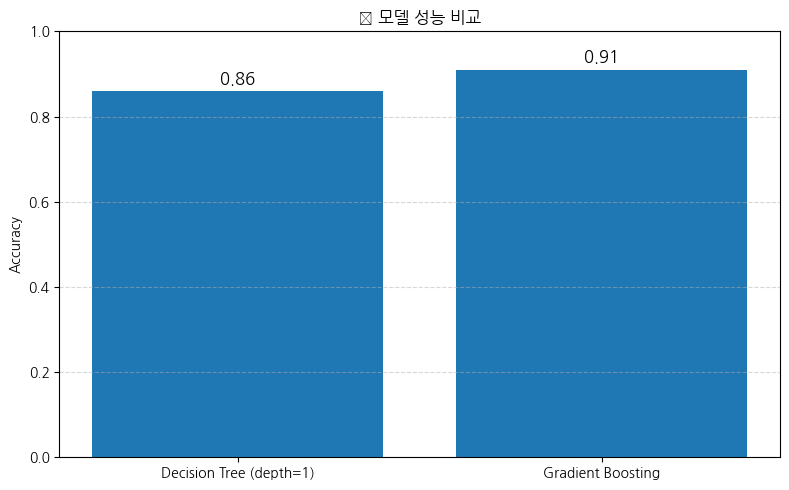

In [ ]:
# ------------------------- [폰트 및 시각화 기본 세팅] -------------------------
import matplotlib.pyplot as plt
import platform

# 운영체제별 한글 + 이모지 폰트 설정 자동 감지
if platform.system() == 'Linux':
    plt.rcParams['font.family'] = 'NanumGothic'  # 우분투/리눅스 NanumGothic
elif platform.system() == 'Darwin':  # 맥OS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # 윈도우
    plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# ------------------------- [필요한 라이브러리 임포트] -------------------------
from sklearn.datasets import make_classification  # 가상 분류용 데이터 생성 도구
from sklearn.model_selection import train_test_split  # 데이터를 훈련/테스트 세트로 나누기
from sklearn.tree import DecisionTreeClassifier  # 결정 트리 분류기
from sklearn.ensemble import GradientBoostingClassifier  # 그레이디언트 부스팅 분류기
from sklearn.metrics import accuracy_score  # 모델 정확도 계산 함수

# ------------------------- [1. 데이터 생성] -------------------------
# 1000개의 샘플, 20개의 특성(feature)을 가진 가상 데이터셋을 생성한다.
# 이진 분류(binary classification) 문제로 y는 0 또는 1로 구성됨
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# ------------------------- [2. 데이터 분할] -------------------------
# 전체 데이터(X, y)를 훈련 세트(.vscode80%)와 테스트 세트(20%)로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------- [3. 약한 모델 - 결정 트리 학습] -------------------------
# max_depth=1 : 트리의 깊이를 1로 제한 → 아주 단순한 모델 (약한 학습기)
dt = DecisionTreeClassifier(max_depth=1, random_state=42)

# 훈련 데이터를 사용해 결정 트리 학습
dt.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
dt_pred = dt.predict(X_test)

# 테스트 데이터에 대한 정확도 계산 및 출력
print("✅ 결정트리 정확도:", accuracy_score(y_test, dt_pred))

# ------------------------- [4. 부스팅 모델 - Gradient Boosting 학습] -------------------------
# n_estimators=100 : 약한 결정 트리를 100개 연속적으로 학습
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# 훈련 데이터를 사용해 부스팅 모델 학습
gb.fit(X_train, y_train)

# 테스트 데이터 예측
gb_pred = gb.predict(X_test)

# 정확도 출력
print("🚀 Gradient Boosting 정확도:", accuracy_score(y_test, gb_pred))

# ------------------------- [5. 성능 비교 시각화] -------------------------
# 모델 이름 리스트
models = ['Decision Tree (depth=1)', 'Gradient Boosting']

# 정확도 리스트
scores = [accuracy_score(y_test, dt_pred), accuracy_score(y_test, gb_pred)]

# 그래프 그리기
plt.figure(figsize=(8, 5))
bars = plt.bar(models, scores)
plt.title("📊 모델 성능 비교")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # 정확도는 0~1 사이 값

# 바 위에 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


✅ 결정트리 정확도: 0.86
🚀 Gradient Boosting 정확도: 0.91


/tmp/ipykernel_34966/565324474.py:50: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  plt.tight_layout()
/home/ccd/miniconda3/envs/mldl_env_250804/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


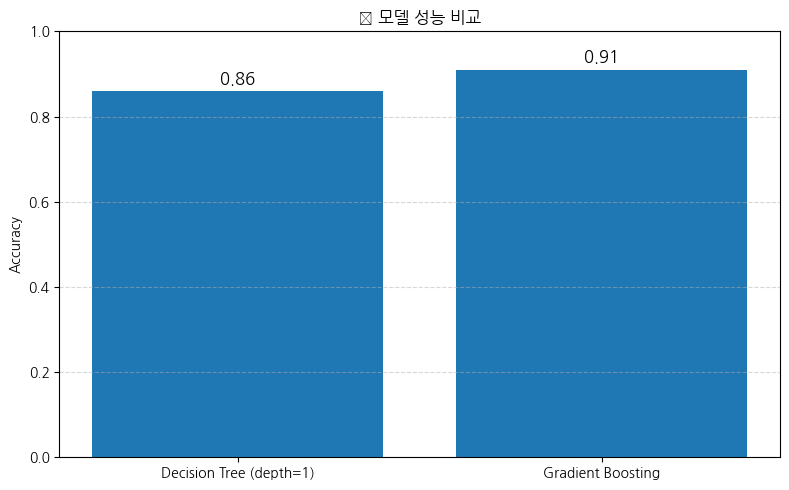

In [9]:
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Linux':
    plt.rcParams['font.family'] = 'NanumGothic'  # 우분투/리눅스 NanumGothic
elif platform.system() == 'Darwin':  # 맥OS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # 윈도우
    plt.rcParams['font.family'] = 'Malgun Gothic'

plt.rcParams['axes.unicode_minus'] = False

from sklearn.datasets import make_classification  # 가상 분류용 데이터 생성 도구
from sklearn.model_selection import train_test_split  # 데이터를 훈련/테스트 세트로 나누기
from sklearn.tree import DecisionTreeClassifier  # 결정 트리 분류기
from sklearn.ensemble import GradientBoostingClassifier  # 그레이디언트 부스팅 분류기
from sklearn.metrics import accuracy_score  # 모델 정확도 계산 함수

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt = DecisionTreeClassifier(max_depth=1, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("✅ 결정트리 정확도:", accuracy_score(y_test, dt_pred))

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("🚀 Gradient Boosting 정확도:", accuracy_score(y_test, gb_pred))

models = ['Decision Tree (depth=1)', 'Gradient Boosting']
scores = [accuracy_score(y_test, dt_pred), accuracy_score(y_test, gb_pred)]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, scores)
plt.title("📊 모델 성능 비교")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # 정확도는 0~1 사이 값

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
